In [1]:
#importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [4]:
#importing dataset

stocks = pd.read_csv('C:/Users/hi/Documents/stocks.csv')

In [5]:
#looking data set 

stocks.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [6]:
#lets inspect the data
#Display summary statistics and data types

stocks.info()
stocks.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [7]:
#Checking for Missing Values: Identify and handle any missing data.

# Check for missing values

stocks.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Convert Date to datetime

stocks['Date'] = pd.to_datetime(stocks['Date'])

In [10]:
# Calculate daily returns

stocks['Daily Return'] = stocks.groupby('Ticker')['Close'].pct_change()

In [11]:
# 2. Exploratory Data Analysis (EDA)
# Separate DataFrames for each stock
aapl = stocks[stocks['Ticker'] == 'AAPL'].copy()
msft = stocks[stocks['Ticker'] == 'MSFT'].copy()
goog = stocks[stocks['Ticker'] == 'GOOG'].copy()


In [12]:
# Descriptive Statistics 
print("Descriptive Statistics for AAPL:")
print(aapl.describe())
print("\nDescriptive Statistics for MSFT:")
print(msft.describe())
print("\nDescriptive Statistics for GOOG:")
print(goog.describe())

Descriptive Statistics for AAPL:
             Open        High         Low       Close   Adj Close  \
count   62.000000   62.000000   62.000000   62.000000   62.000000   
mean   157.779839  159.473710  156.670645  158.240645  158.229397   
std      7.224608    7.167176    7.345529    7.360485    7.369573   
min    144.380005  146.710007  143.899994  145.309998  145.309998   
25%    151.489998  153.545002  150.474998  152.077499  151.903801   
50%    158.400002  159.869995  157.109993  158.055000  158.055000   
75%    164.702503  165.750004  163.797504  165.162506  165.162506   
max    170.979996  174.300003  170.759995  173.570007  173.570007   

             Volume  Daily Return  
count  6.200000e+01     61.000000  
mean   6.028296e+07      0.001991  
std    1.430605e+07      0.014152  
min    4.151620e+07     -0.026680  
25%    4.960702e+07     -0.007591  
50%    5.609455e+07      0.000121  
75%    6.837618e+07      0.008377  
max    1.133164e+08      0.046927  

Descriptive Statisti

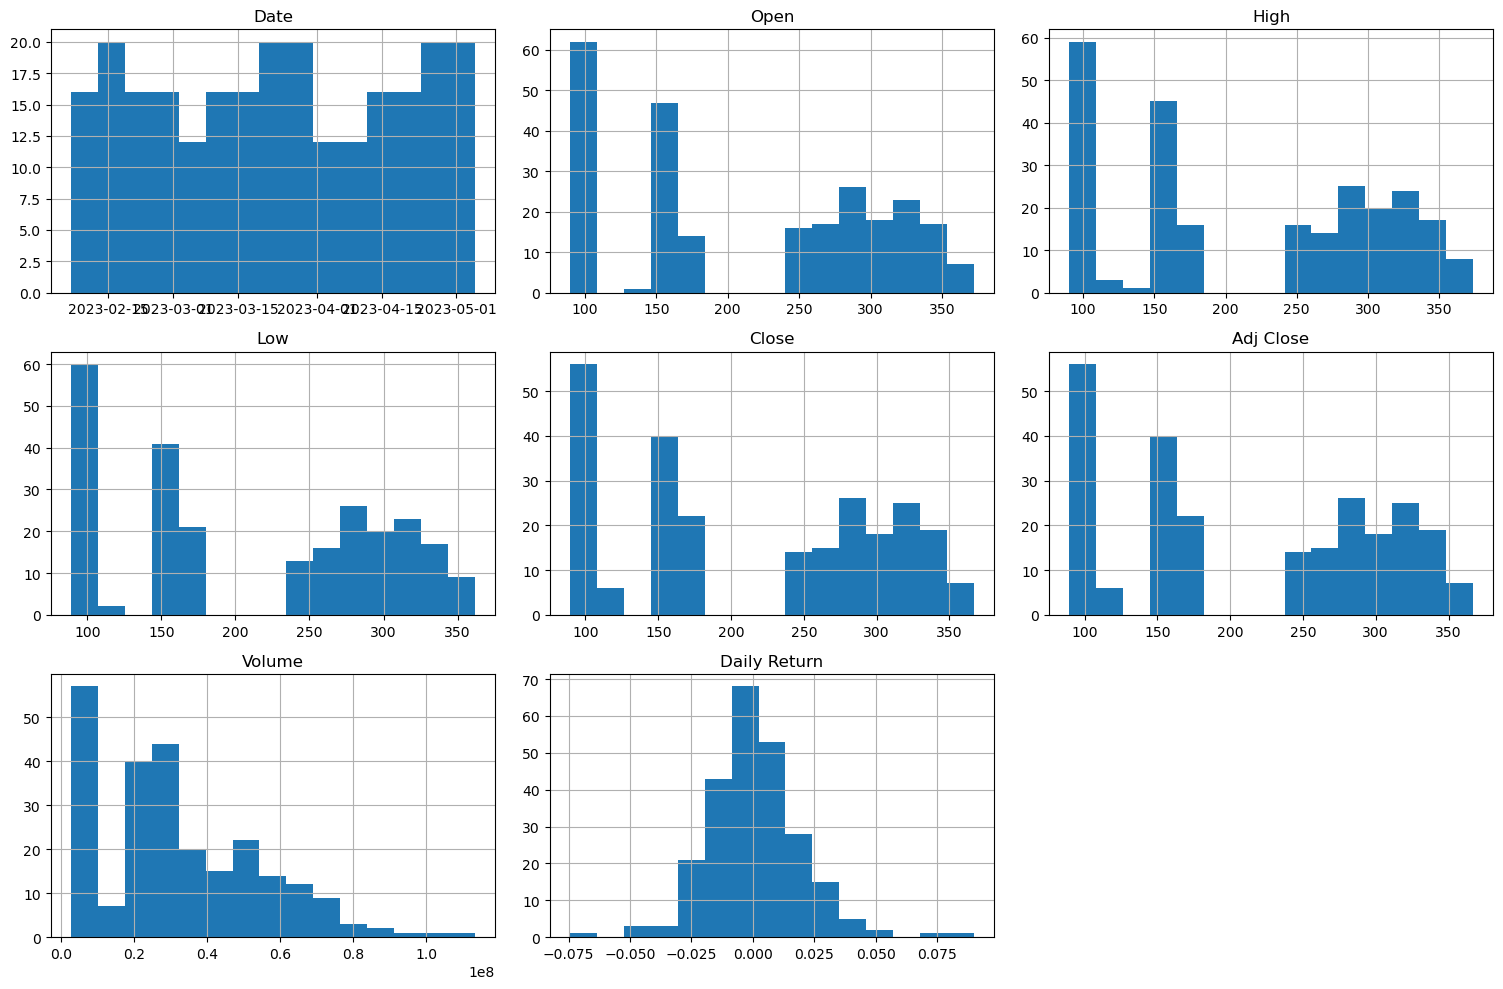

In [13]:
#Exploring Data Characteristics: Descriptive statistics and distributions.

#Exploring Data Characteristics

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns

stocks.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_17412\1295945010.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks.corr()


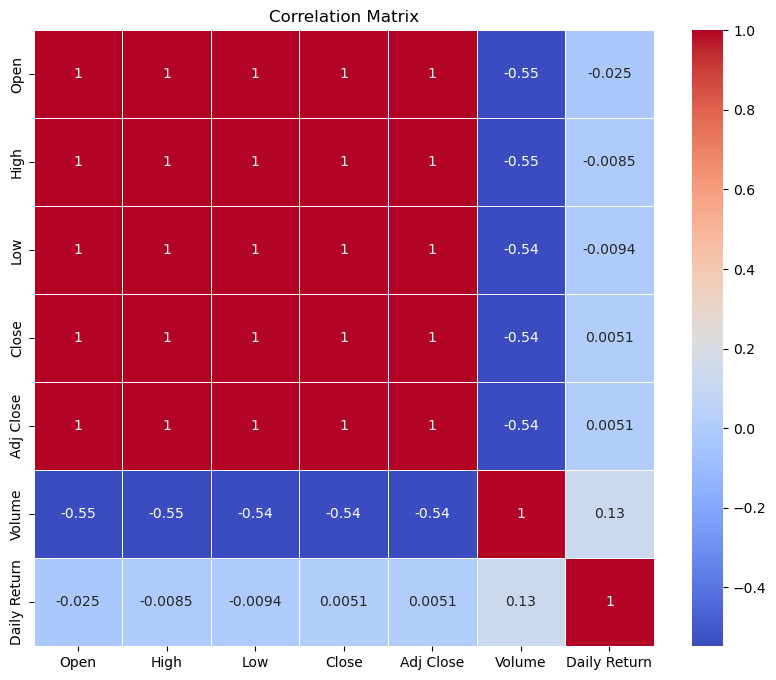

In [14]:
#Correlation Analysis: Identify relationships between variables.

#Correlation Analysis

# Correlation matrix

corr_matrix = stocks.corr()

# Heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


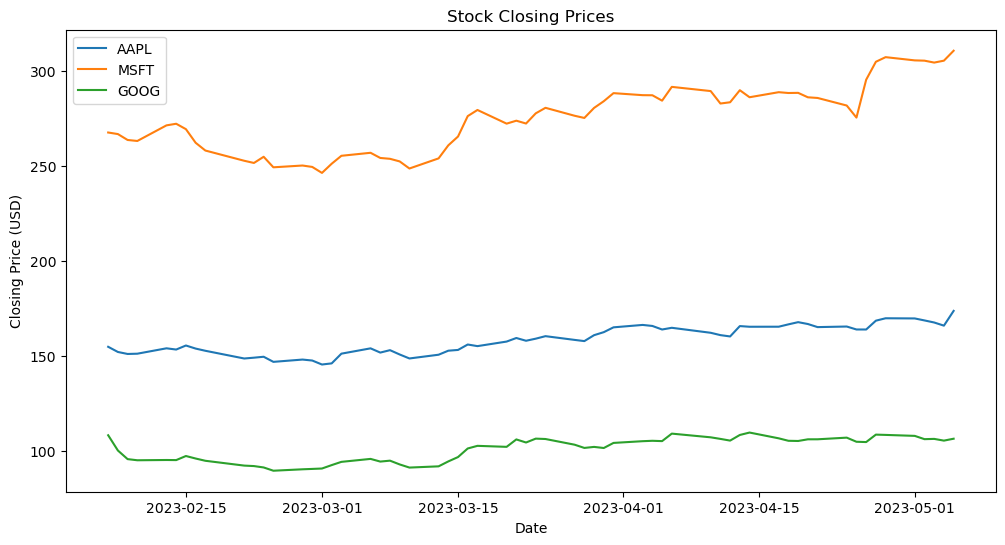

In [15]:
# Time Series Visualization (Closing Prices)

plt.figure(figsize=(12, 6))
plt.plot(aapl['Date'], aapl['Close'], label='AAPL')
plt.plot(msft['Date'], msft['Close'], label='MSFT')
plt.plot(goog['Date'], goog['Close'], label='GOOG')
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


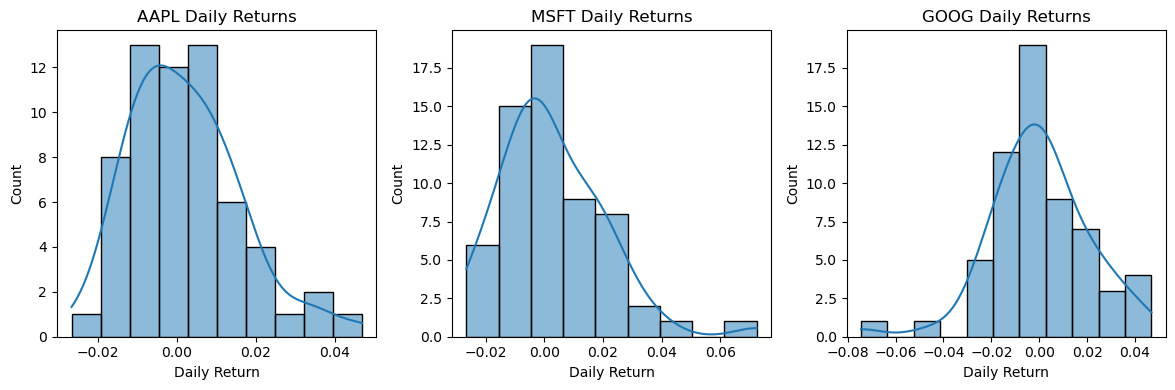

In [16]:
# Daily Return Analysis (Histograms)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(aapl['Daily Return'].dropna(), kde=True)
plt.title('AAPL Daily Returns')

plt.subplot(1, 3, 2)
sns.histplot(msft['Daily Return'].dropna(), kde=True)
plt.title('MSFT Daily Returns')

plt.subplot(1, 3, 3)
sns.histplot(goog['Daily Return'].dropna(), kde=True)
plt.title('GOOG Daily Returns')

plt.tight_layout()
plt.show()

In [17]:
# Correlation Analysis

daily_returns = stocks.pivot(index='Date', columns='Ticker', values='Daily Return').dropna()
correlation_matrix = daily_returns.corr()

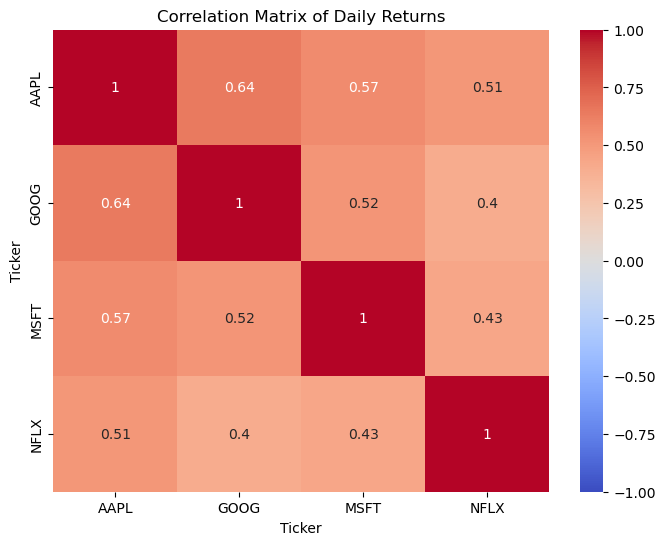

In [18]:
# Heatmap for Correlation

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

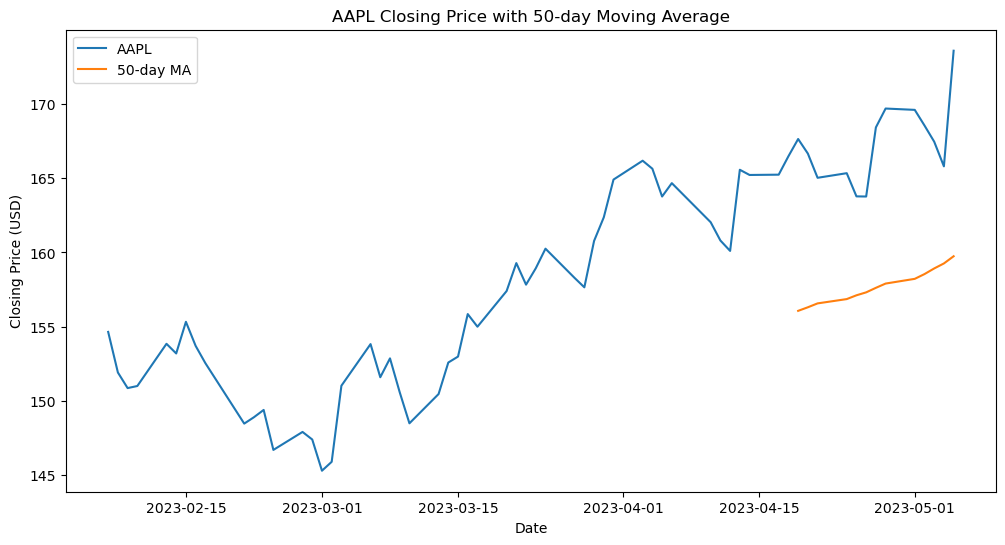

In [19]:
# 3. Moving Averages (Example with AAPL - 50-day moving average)

aapl['50MA'] = aapl['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(aapl['Date'], aapl['Close'], label='AAPL')
plt.plot(aapl['Date'], aapl['50MA'], label='50-day MA')
plt.title('AAPL Closing Price with 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

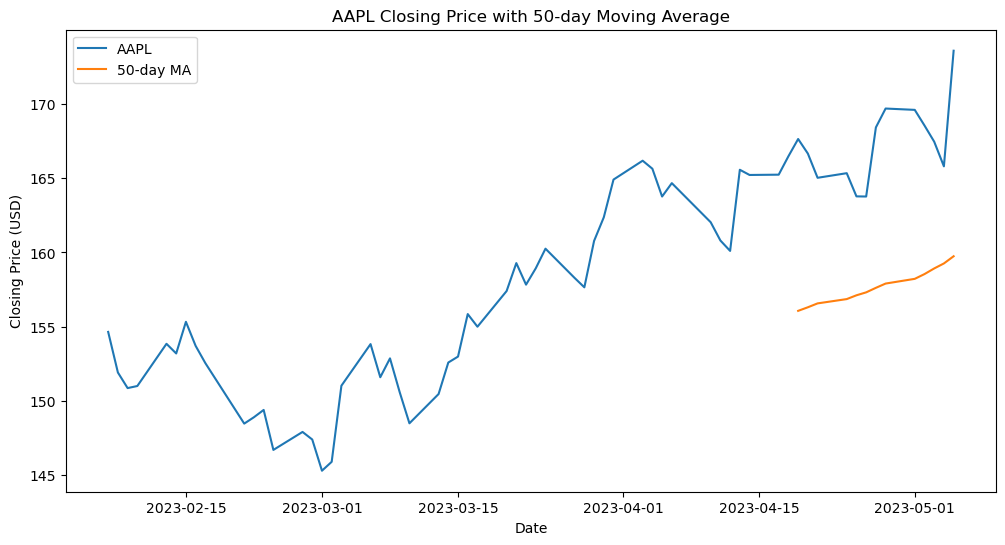

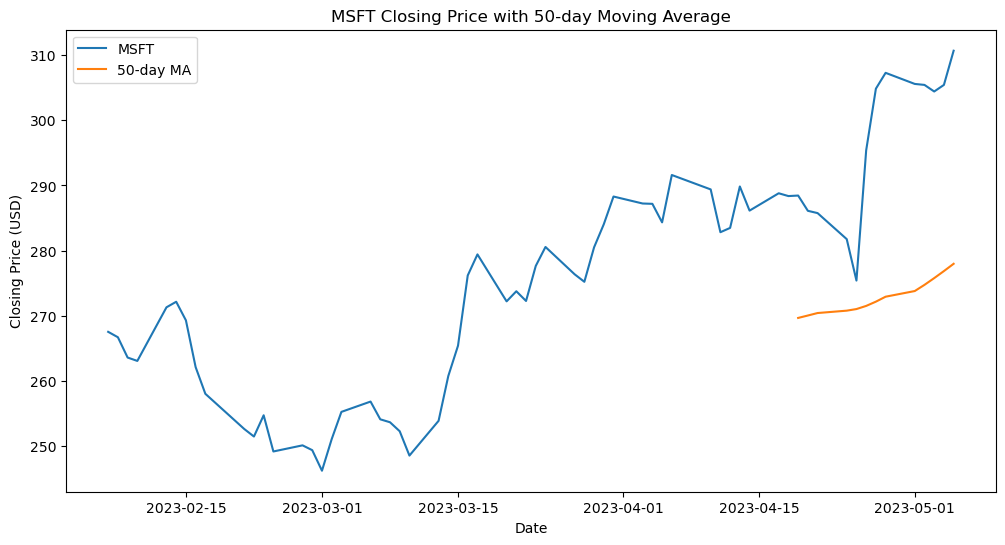

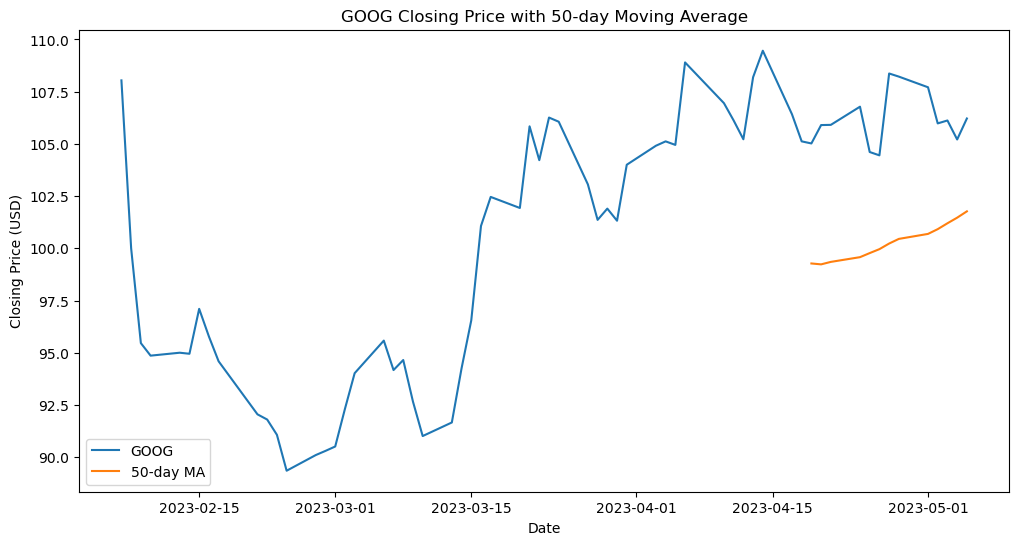

In [20]:

def plot_moving_average(data, ticker):
    """Plots closing price and 50-day MA for a given stock."""
    data['50MA'] = data['Close'].rolling(window=50).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label=ticker)
    plt.plot(data['Date'], data['50MA'], label='50-day MA')
    plt.title(f'{ticker} Closing Price with 50-day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.show()

plot_moving_average(aapl, 'AAPL')
plot_moving_average(msft, 'MSFT')
plot_moving_average(goog, 'GOOG')

In [21]:
#importing relevant libraries for prediction using ARIMA
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [22]:
# Function to create lagged features for ARIMA

def create_lags(data, lags=1):
    for i in range(1, lags + 1):
        data[f'Lag_{i}'] = data['Close'].shift(i)
    return data.dropna()

In [23]:
# Function to split data into train and test sets
def split_data(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train, test = data[0:train_size], data[train_size:]
    return train, test

In [24]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} RMSE: {rmse:.2f}')


In [26]:
# 1. Data Preparation
stocks = pd.read_csv("C:/Users/hi/Documents/stocks.csv")
stocks['Date'] = pd.to_datetime(stocks['Date'])
aapl = stocks[stocks['Ticker'] == 'AAPL'].copy().set_index('Date')


In [27]:
# 2. ARIMA Model
# Feature Engineering

aapl_arima = create_lags(aapl.copy(), lags=5) # Create lagged features
train_arima, test_arima = split_data(aapl_arima, train_ratio=0.8)

In [29]:
# Prediction and Evaluation
predictions_arima = model_fit_arima.predict(start=len(train_arima), end=len(aapl_arima)-1)
evaluate_model(test_arima['Close'], predictions_arima, 'ARIMA')

ARIMA RMSE: 2.99


C:\Users\hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


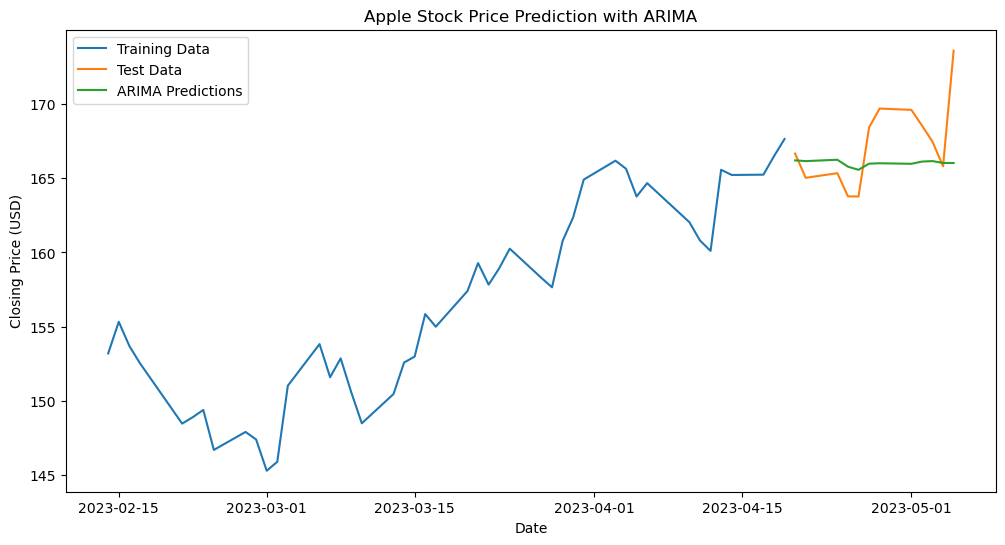

In [30]:
# 3. Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_arima['Close'], label='Training Data')
plt.plot(test_arima['Close'], label='Test Data')
plt.plot(test_arima.index, predictions_arima, label='ARIMA Predictions')
plt.title('Apple Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [ ]:
#Project Conclusion:
#Findings:
#ARIMA Model: The ARIMA model has been implemented to predict Apple's stock prices.
#You'll need to carefully tune the (p, d, q) order of the ARIMA model to find the optimal parameters that fit the data well. This can be done using techniques like ACF and PACF plots or using grid search with AICc or BIC scores.
#RMSE (Root Mean Squared Error) is used as a measure to evaluate the prediction accuracy. A lower RMSE indicates better prediction accuracy.